<a href="https://colab.research.google.com/github/jufabeck2202/KI-Lab/blob/main/aufgabe6/SarsaQLearningMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import random
import gym
import matplotlib.pyplot as plt
import numpy as np
env = gym.make("FrozenLake-v0")


# Q-Learning

In [2]:
#Q-Learning- off Policy
#“If one had to identify one idea as central and novel to reinforcement learning,
#it would undoubtedly be temporal differencelearning.“ - Sutton Book 
#• Temporal differencing (TD) learning is a combination of dynamic programming (DP) and Monte Carlo (MC) methods.
#• Like MC methods, TD methods can learn directly from experience without knowing the MDP structure.
#• Like DP, TD methods update estimates based partially on other learned estimates,
#  without waiting for a final outcome (“bootstrapping”).
# Use reward and estimated state value of next state to update current state value
#TD: New evidence based on current reward and state value of next state
#Q-learning is off-policy and uses:
#• TD-prediction for policy evaluation.
#• An -greedy policy as behaviour policy.
#• A greedy policy as target policy.
#• One can show that the learned Q-values directly approximate the optimal Q-values.
class QLearning:
    def __init__(self, no_episodes, mean_episodes, epsilons, lr, gamma ) -> None:
        self.no_episodes = no_episodes
        self.mean_episodes = mean_episodes
        self.epsilons = epsilons
        self.gamma = gamma
        self.lr = lr

    def play_episode(self,q_values, epsilon):
        state = env.reset()
        done = False
        r_s = []
        while not done:
            #choose action action
            action = self.choose_action(q_values, state, epsilon)
            #take action
            state2, reward, done, _ = env.step(action)
            self.updateQ(state, state2, reward, action, q_values)
            state = state2
            r_s.append(reward)
        return r_s

    def updateQ(self,state, state2, reward, action, q_values):
        #update = Q(S,A)+learningRate*(R+gamma maxQ(S´, a) - Q(S,A)))
        #update q value
        target = reward + self.gamma * np.max(q_values[state2, :])
        q_values[state, action] = q_values[state, action] + self.lr * (target - q_values[state, action])

    def init_q(self,):
        return np.zeros((env.observation_space.n, env.action_space.n))

    #seperate policy for choosing actions
    def choose_action(self,q_values, state, epsilon):
        if random.random() > epsilon:
            #take optimal action
            return np.argmax(q_values[state, :])
        else:
            return env.action_space.sample()

    def play(self):
        #save data
        epsilons_array = {}
        
        for e in self.epsilons:
            epsilons_array[e] = None
        #loop epsilons
        for epsi in self.epsilons:
            total_reward = []
            for m in range(0, self.mean_episodes):
                rewards = []
                q_values = self.init_q()

                for i in range(0, self.no_episodes):
                    r = self.play_episode(q_values, epsilon=epsi)
                    rewards.append(sum(r))
                total_reward.append(np.cumsum(rewards))

            total_reward = np.array(total_reward)
            total_reward = total_reward.T
            epsilons_array[epsi] = total_reward
        return epsilons_array

# Sarsa

In [3]:
class Sarsa:
    def __init__(self, no_episodes, mean_episodes, epsilons,lr, gamma ) -> None:
        self.no_episodes = no_episodes
        self.mean_episodes = mean_episodes
        self.epsilons = epsilons
        self.gamma = gamma
        self.lr = lr
    def play_episode(self, q_values, epsilon):
        state = env.reset()
        action = self.choose_action(q_values, state, epsilon)
        done = False
        r_s = []
        while not done:
            state2, reward, done, info = env.step(action)

            action2 = self.choose_action(q_values, state, epsilon)
            
            self.updateQ(state, state2, reward, action, action2, q_values)

            state = state2
            action = action2
            r_s.append(reward)

        return r_s


    def updateQ(self, state, state2, reward, action, action2, q_values):
        # update Q(S,A)+learningRate(R+gamma Q(S´, A´) - Q(S,A)))
        target = reward + self.gamma * q_values[state2, action2]
        q_values[state, action] = q_values[state, action] + self.lr * (target - q_values[state, action])


    def init_q(self):
        return np.zeros((env.observation_space.n, env.action_space.n))


    def choose_action(self, q_values, state, epsilon):
        if random.random() > epsilon:
            return np.argmax(q_values[state, :])
        else:
            return env.action_space.sample()

    def play(self):
        epsilons_array = {}
        
        for e in self.epsilons:
            epsilons_array[e] = None

        for epsi in self.epsilons:
            total_reward = []
            for m in range(0, self.mean_episodes):
                rewards = []
                q_values = self.init_q()
                for i in range(0, self.no_episodes):
                    r = self.play_episode(q_values, epsilon=epsi)
                    rewards.append(sum(r))
                total_reward.append(np.cumsum(rewards))
            total_reward = np.array(total_reward)

            total_reward = total_reward.T
            epsilons_array[epsi] = total_reward
        return epsilons_array

## Frozen Lake ##
Start state:


# MC-Control
  

In [6]:
class MCControl:
    def __init__(self, no_episodes, mean_episodes, epsilons) -> None:
        self.no_episodes = no_episodes
        self.mean_episodes = mean_episodes
        self.epsilons = epsilons

    def init_q(self):
        q_values = {}
        for s in range(0, env.observation_space.n):
            for a in range(0, env.action_space.n):
                q_values[(s, a)] = 0
        return q_values

    def play_episode(self, q_values, epsilon):
        state = env.reset()
        done = False
        r_s = []
        s_a = []
        while not done:
            action = self.choose_action(q_values, state, epsilon)

            s_a.append((state, action))
            state, reward, done, _ = env.step(action)
            r_s.append(reward)
        return s_a, r_s

    def choose_action(self, q_values, state, epsilon):
        if random.random() > epsilon:
            relevant_qs = [q_values[(state, a)]
                           for a in range(0, env.action_space.n)]
            # there can be more than one best action
            best_actions_indexes = [i for i, v in enumerate(
                relevant_qs) if v == max(relevant_qs)]
            # in this case randomly choose on of them
            return random.choice(best_actions_indexes)
        else:
            return random.randint(0, 3)

    def play(self):
        # spielt Frozen lake mit verschiedenen Epsilons (Explorieren)
        # Monte Carlo Control
        # Nach jeder Episode updaten der Q-Values
        # Summe des Rewards
        # Monte Carlo control methods do not suffer from this bias,
        # as each update is made using a true sample of what Q(s,a) should be.
        # However, Monte Carlo methods can suffer from high variance,
        # which means more samples are required to achieve the same degree of learning compared to TD.
        # Monte Carlo Prediction (MC)
        # Any method which solves a problem by generating suitable random numbers,
        # and observing that fraction of numbers obeying some property or properties,
        # can be classified as a Monte Carlo method.”1
        # “Given a policy, create sample episodes following that policy
        # and estimate state and Q-values from the collected experiences.”
        # No knowledge about MDP needed (model-free approach).
        # The more episodes we sample, the closer the estimates of the state
        # values approach the real state values (law of large numbers).
        # Drawback: Can only be applied to episodic problems.
        # MC: New evidence based on observed return (at end of episode)

        epsilons_array = {}

        for e in self.epsilons:
            epsilons_array[e] = None

        for epsi in self.epsilons:
            total_reward = []
            for m in range(0, self.mean_episodes):
                rewards = []
                q_values = self.init_q()
                for i in range(0, self.no_episodes):
                    s, r = self.play_episode(q_values, epsilon=epsi)
                    # Calculate empirical return Gt in every state that was visited.
                    rewards.append(sum(r))
                    # Calculate V(s) for every state by aggregating the empirical returns received in s.
                    # update q-values
                    for i2, q in enumerate(s):
                        return_i = sum(r[i2:])
                        q_values[q] += 0.3 * (return_i - q_values[q])
                total_reward.append(np.cumsum(rewards))
            total_reward = np.array(total_reward)

            total_reward = total_reward.T
            epsilons_array[epsi] = total_reward
        return epsilons_array

# Run

No handles with labels found to put in legend.


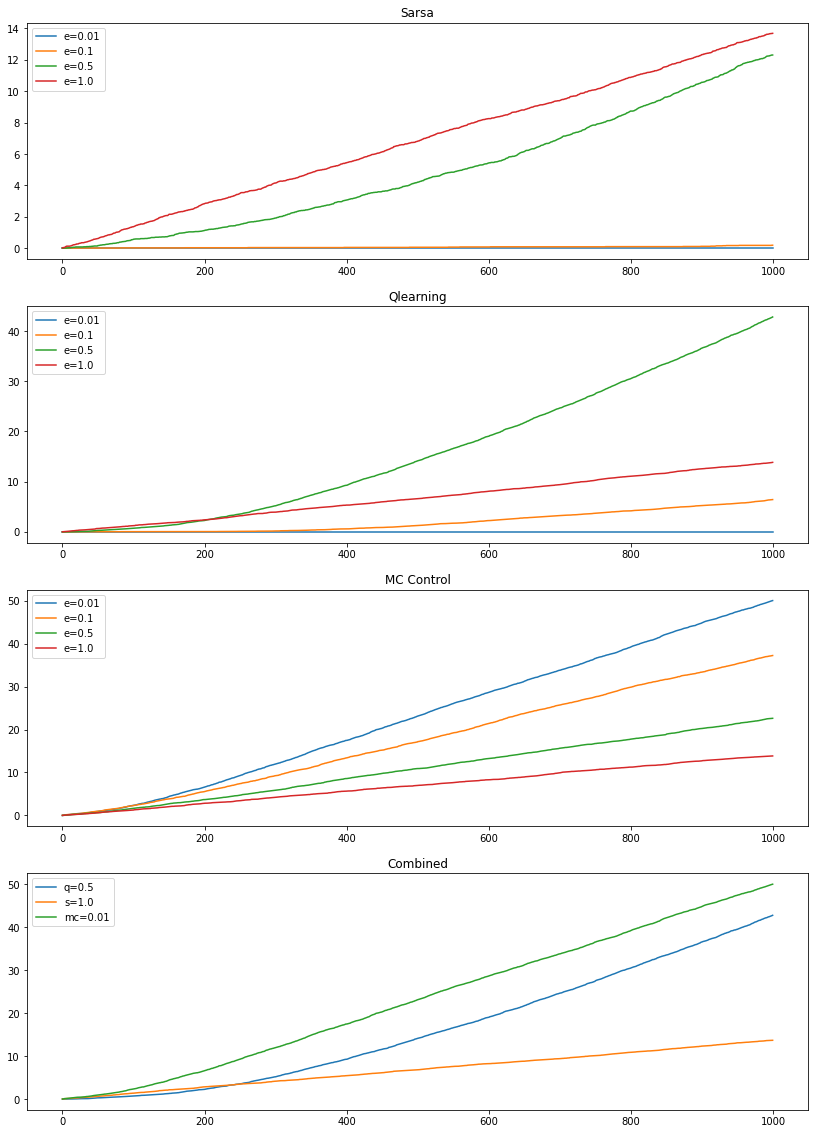

In [13]:
epsilons = [0.01, 0.1, 0.5, 1.0]
no_episodes = 1000
mean_episodes = 100
lr = 0.3
gamma = 1

env = gym.make("FrozenLake-v0")
qlearning = QLearning(no_episodes, mean_episodes, epsilons, lr, gamma)
qresults = qlearning.play()
env = gym.make("FrozenLake-v0")
sarsa = Sarsa(no_episodes, mean_episodes, epsilons, lr, gamma)
sarsaresults = sarsa.play()
env = gym.make("FrozenLake-v0")
mccontrol = MCControl(no_episodes, mean_episodes, epsilons)
mcresults = mccontrol.play()


best_epsilon  = {}
#get best epsilon for every algo -> NP max not correct yet
best_epsilon["qlearning"] = max(qresults, key=lambda k: np.mean(qresults[k]))
best_epsilon["sarsa"] = max(sarsaresults, key=lambda k: np.mean(sarsaresults[k]))
best_epsilon["mcresults"] = max(mcresults, key=lambda k: np.mean(mcresults[k]))


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(14,20))
for eps in epsilons:
    ax1.plot(range(0, no_episodes), np.mean(
        sarsaresults[eps], axis=1), label="e=" + str(eps))
    ax2.plot(range(0, no_episodes), np.mean(
        qresults[eps], axis=1), label="e=" + str(eps))
    ax3.plot(range(0, no_episodes), np.mean(
        mcresults[eps], axis=1), label="e=" + str(eps))
plt.legend()

ax4.plot(range(0, no_episodes), np.mean(
    qresults[best_epsilon["qlearning"]], axis=1), label="q=" + str(best_epsilon["qlearning"]))
ax4.plot(range(0, no_episodes), np.mean(
    sarsaresults[best_epsilon["sarsa"]], axis=1), label="s=" + str(best_epsilon["sarsa"]))
ax4.plot(range(0, no_episodes), np.mean(
    mcresults[best_epsilon["mcresults"]], axis=1), label="mc=" + str(best_epsilon["mcresults"]))
plt.legend()

ax1.set_title('Sarsa')
ax2.set_title('Qlearning')
ax3.set_title('MC Control')
ax4.set_title('Combined')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
#fig.savefig('results.png', dpi=fig.dpi)
plt.show()